# Machine Learning - Agrupamento/Cluterização

O agrupamento ou clusterização é um tipo de aprendizado de máquina não supervisionado, que como o próprio nome sugere é responsável por separar os dados de uma análise em diferentes grupos da melhor maneira possível.

## Método K-Means

Funcionamento:

    1 - Primeiro, preciso definir um ‘K’, ou seja, um número de clusters (ou agrupamentos).
    2 - Depois, preciso definir, aleatoriamente, um centroide para cada cluster.
    3 - O próximo passo é calcular, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide mais próximo (lembrar do exemplo do CD logístico e das lojas: cada loja (ponto) deve ser atendida pelo CD (centróide) mais próximo)
    4 - Agora, devo reposicionar o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.
    5 - Os dois ultimos passos são repetidos, iterativamente, até obtermos a posição ideal dos centróides.

<img src="kmeans.jpg" style=width:500px;height:400px/>

## Exemplo 1

### Importando bibliotecas

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

### Criação dos dados

In [91]:
# Criando dados usando a função make blobs (Parametros são: n° de amostras, n° de características, n° de centros,
# espalhamento dos dados, e embaralhamento dos dados)

data, labels = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=0.5, shuffle=True)
print(data)

[[-3.35343848 -6.19448585]
 [ 3.56054377  7.68635279]
 [-3.75046607 -5.61595255]
 [ 3.04223827  7.45868704]
 [ 5.25955988  1.80381117]
 [-3.63469036 -5.17575482]
 [ 4.54513726  2.16474637]
 [ 3.63893253  7.85744319]
 [ 3.46432152  8.49993479]
 [-3.83952931 -4.96749452]
 [ 5.16128407  2.09911804]
 [-4.05791617 -5.52468942]
 [-4.55054523 -5.6160901 ]
 [-4.02543256 -5.36327419]
 [ 5.23322465  2.54956415]
 [ 4.50557703  1.4704892 ]
 [ 2.67730079  8.21635396]
 [ 3.03303923  7.77870368]
 [ 2.90426308  8.44753686]
 [ 5.77184342  2.5720822 ]
 [ 3.63630159  7.66724713]
 [-4.08983869 -5.95144798]
 [-2.89149711 -5.76195887]
 [ 3.37095216  9.08734029]
 [ 4.29781532  2.54822068]
 [ 4.6777253   1.4663116 ]
 [ 5.77692199  1.66890466]
 [-3.41068306 -5.22909135]
 [-3.57666989 -4.81258522]
 [ 5.51505877  1.58493572]
 [ 4.56513658  2.9322991 ]
 [ 3.56480066  8.25763053]
 [ 2.86879221  7.36353433]
 [ 4.61145085  2.48770051]
 [ 5.4379914   2.2327533 ]
 [ 3.25532618  7.96164099]
 [-3.89375703 -6.06636066]
 

### Análise exploratória

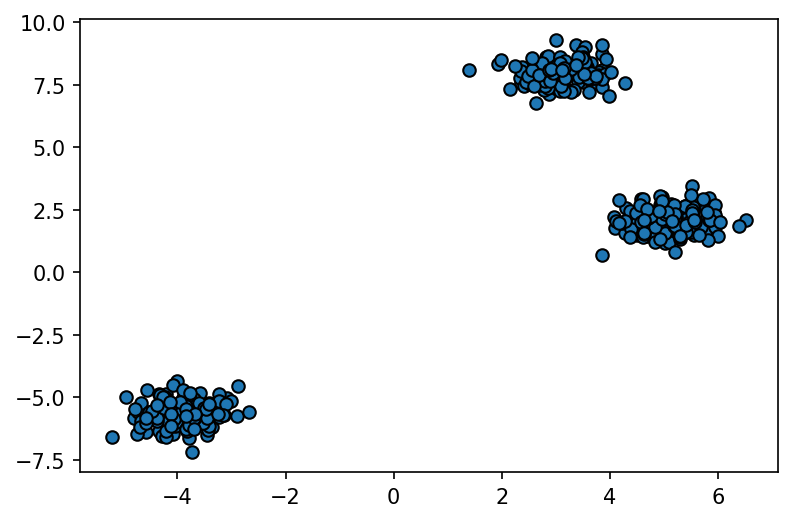

In [92]:
plt.rcParams['figure.dpi'] = 150
plt.scatter(data[:, 0], data[:, 1], marker="o", edgecolors="black")
plt.show()

### Criação do KMeans

In [93]:
# Instanciando um modelo KMeans e passando os dados gerados para treinamento
modelo = KMeans(n_clusters=3)
modelo.fit(data)

KMeans(n_clusters=3)

### Predição

In [94]:
# Prevendo os valores dos dados
resposta = modelo.predict(data)


# Separando os grupos de acordo com o que o modelo previu
grupo_1 = data[resposta == 0]
grupo_2 = data[resposta == 1]
grupo_3 = data[resposta == 2]
centros = modelo.cluster_centers_

### Plotando o gráfico

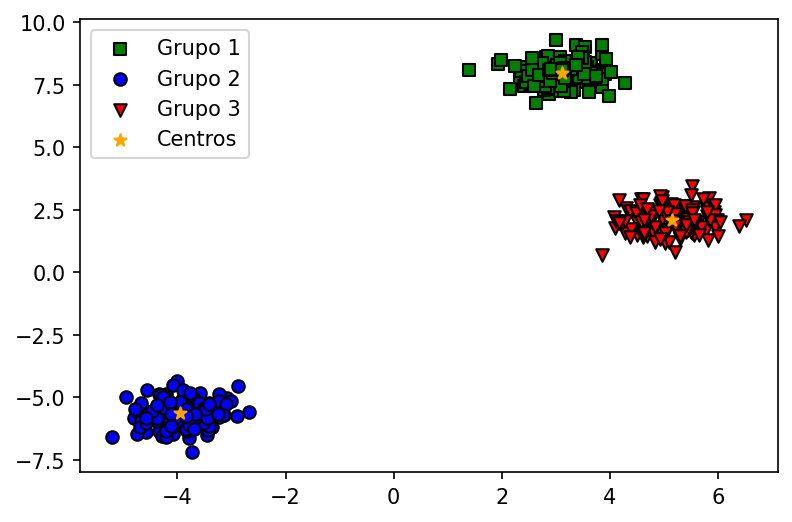

In [95]:
plt.scatter(grupo_1[:, 0], grupo_1[:, 1], c="green", marker="s", label="Grupo 1", edgecolors="black")
plt.scatter(grupo_2[:, 0], grupo_2[:, 1], c="blue", marker="o", label="Grupo 2", edgecolors="black")
plt.scatter(grupo_3[:, 0], grupo_3[:, 1], c="red", marker="v", label="Grupo 3", edgecolors="black")
plt.scatter(centros[:, 0], centros[:, 1], c="orange", label="Centros", marker="*")

plt.legend(scatterpoints=1)

plt.show()

### Avaliações

### Índice Calinski Harabasz

O índice CH (também conhecido como critério de razão de variância ) é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). Aqui, a coesão é estimada com base nas distâncias dos pontos de dados em um cluster ao seu centróide do cluster e a separação é baseada na distância dos centróides do cluster do centróide global. (Quanro maior o valor, melhor foi a divisão).

### Silhouette Score

Varia entre -1 e 1 de nos mostra o quão bem os elementos estão agrupados levando em conta algumas definições matemáticas. (Quanto mais próximo de 1, melhor foi a divisão).

In [96]:
# Avaliando o modelo dentro dos dois métodos de avaliação, passando os dados e os labels obtidos no treinamento como parametro
print("CH:", calinski_harabasz_score(data, modelo.labels_))
print("SC:", silhouette_score(data, modelo.labels_))

CH: 19410.614426435484
SC: 0.8830678934865455


## Exemplo 2

### Importando os dados

In [74]:
# Importando o csv
data2 = pd.read_csv("clustering_data.csv", sep=";")
data2.head()

,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363


### Análise exploratória

### Verificando a presença de elementos nulos e excluindo-os

In [76]:
print("Total de dados:", len(data2)) #Mostrando o total de dados
display(data2.isna().any()) #Verificando a presença de dados nulos
data2 = data2.dropna() #Excluindo os dados nulos
print("Total de dados:", len(data2)) #Mostrando o total de dados novamente

Total de dados: 2297


f1    True
f2    True
dtype: bool

Total de dados: 1703


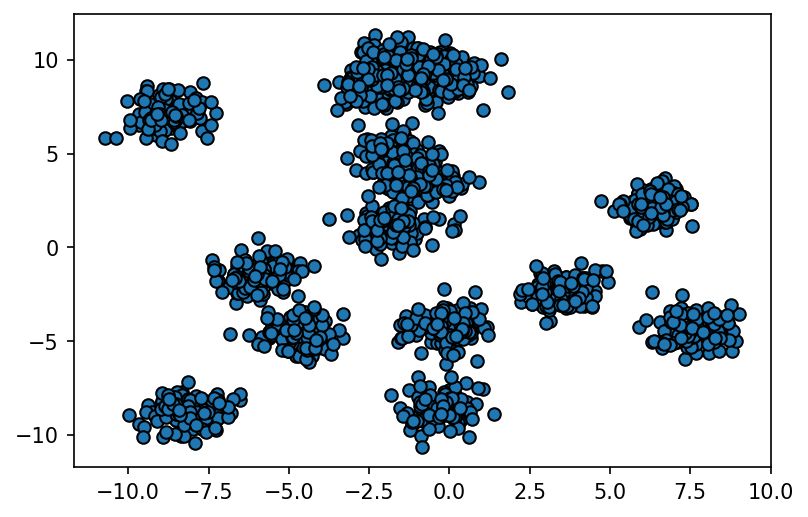

In [77]:
plt.rcParams['figure.dpi'] = 150
plt.scatter(data2["f1"], data2["f2"], marker="o", edgecolor="black")
plt.show()

### Elbow Method

Método onde treinamos nosso modelo com diferentes números de clusters possíveis e posteriormente analisamos qual o número ideal. Número esse que é definido pelo ponto onde a reta do gráfico começa a se tornar constante.

In [78]:
# Todos dados são para treino
# Transformando em array do numpy
x = np.array(data2)
print(x)

[[ 0.01863667  8.96499819]
 [-5.737664   -1.86068695]
 [-4.19508688 -4.6417399 ]
 ...
 [-7.30031466 -9.62081282]
 [-0.54031681  4.13978919]
 [-1.38781658  4.66333865]]


In [79]:
# Testando a diferentes números possíveis de clusters entre 1 e 20, avaliando-os, e salvando as avaliações em uma lista
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i)
    km.fit(x)
    metrica = km.inertia_
    distortions.append(metrica)

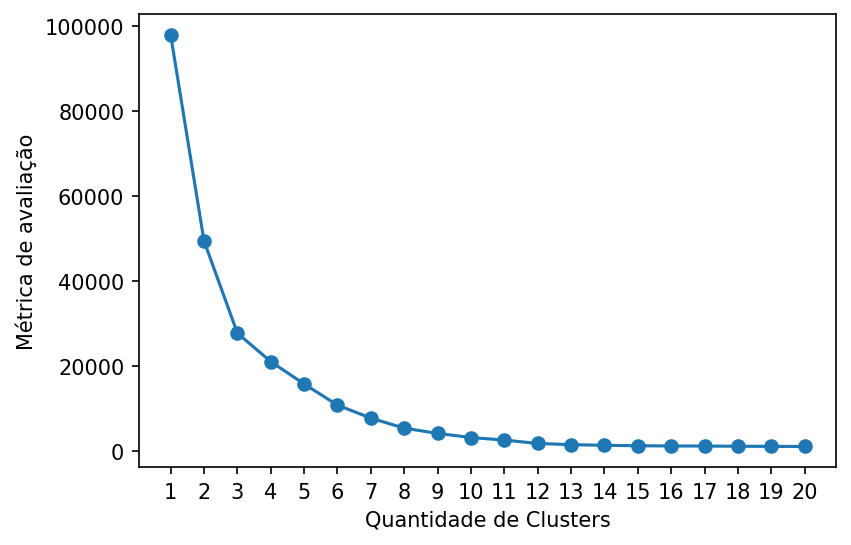

In [80]:
# Plotando o gráfico
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Métrica de avaliação")
plt.xticks(range(1, 21))
plt.show()

### Criando o KMeans

In [81]:
# Instanciando o modelo
modelo2 = KMeans(n_clusters=13)
modelo2.fit(x)

KMeans(n_clusters=13)

### Predição

In [82]:
# Prevendo os valores
resposta2 = modelo2.predict(x)

### Mostrando Gráfico

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

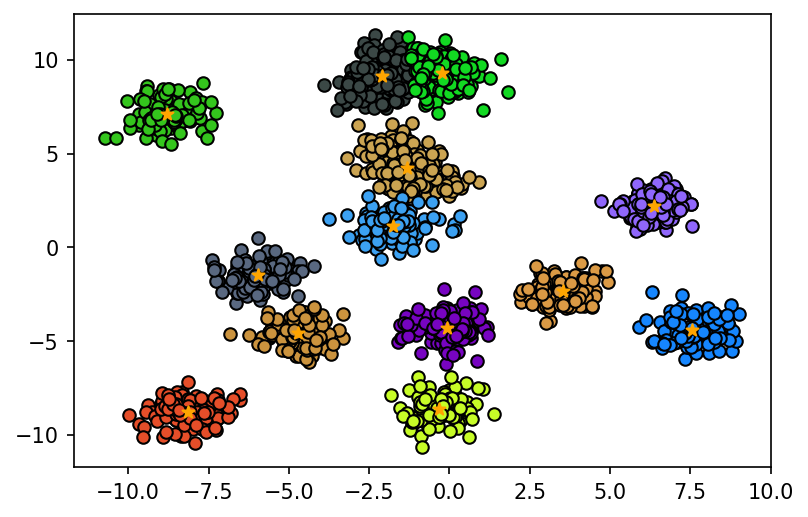

In [85]:
centros2 = modelo2.cluster_centers_

for i in range(13):
    grupo_i = x[resposta2 == i]
    plt.scatter(grupo_i[:,0] ,grupo_i[:,1], c=np.random.rand(3), edgecolors=("black") )
    
plt.scatter(centros2[:, 0], centros2[:, 1], c="orange", label="Centros", marker="*")
plt.show()

In [86]:
# Avaliando o modelo dentro dos dois métodos de avaliação, passando os dados e os labels obtidos no treinamento como parametro
print("CH:", calinski_harabasz_score(data2, modelo2.labels_))
print("SC:", silhouette_score(data2, modelo2.labels_))

CH: 8736.746790590443
SC: 0.6345099296468563
